In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import warnings
import gdown
warnings.filterwarnings('ignore')
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
#pd.set_option('display.max_rows',none)
pd.reset_option('display.max_rows')

In [2]:
# gdown.download_folder(url="https://drive.google.com/drive/folders/1ul1CK3kv9mHX2NY1zmjsSRPlIKXBXotf?usp=sharing", use_cookies=False, quiet=False)

In [3]:
potato_price=pd.read_csv("../data/156수민/감자garakFix20250903153031726.csv",encoding= "cp949")
sweet_price=pd.read_csv("../data/156수민/고구마garakFix20250903153124390.csv",encoding= "cp949")
oyster_price=pd.read_csv("../data/156수민/느타리버섯garakFix20250903151558966.csv",encoding= "cp949")
dan_price=pd.read_csv("../data/156수민/단호박garakFix20250903153106255.csv",encoding= "cp949")
new_price=pd.read_csv("../data/156수민/새송이버섯garakFix20250903151641579.csv",encoding= "cp949")
sheep_price=pd.read_csv("../data/156수민/양송이버섯garakFix20250903151700224.csv",encoding= "cp949")
red_price=pd.read_csv("../data/156수민/적양배추garakFix20250903152918646.csv",encoding= "cp949")
tomato_price=pd.read_csv("../data/156수민/토마토전체garakFix20250903153007166.csv",encoding= "cp949")
spin_price=pd.read_csv("../data/156수민/팽이버섯garakFix20250903151546379.csv",encoding= "cp949")
pyogo_price=pd.read_csv("../data/156수민/표고버섯garakFix20250903151537560.csv",encoding= "cp949")


In [4]:
import pandas as pd
from io import StringIO
import sys

# 1) 매핑
data_dict = {
    "감자": potato_price,
    "고구마": sweet_price,
    "느타리버섯": oyster_price,
    "단호박": dan_price,
    "새송이버섯": new_price,
    "양송이버섯": sheep_price,
    "적양배추": red_price,
    "토마토": tomato_price,
    "팽이버섯": spin_price,
    "표고버섯": pyogo_price,
}

# 2) 루프 돌며 요약 출력
for name, df in data_dict.items():
    print("="*80)
    print(f"{name} 데이터 요약")
    print("="*80)

    # --- info() 출력 ---
    buf = StringIO()
    df.info(buf=buf)
    info_str = buf.getvalue()
    print("\n[info()]")
    print(info_str)

    # --- describe() 출력 ---
    print("\n[describe()]")
    print(df.describe(include='all'))  # 숫자+범주형 전체 요약

    # --- value_counts() (상위 10개) ---
    print("\n[value_counts()]")
    for col in df.columns:
        try:
            vc = df[col].value_counts(dropna=False).head(10)
            print(f"\n{col} (Top 10)")
            print(vc)
        except Exception as e:
            print(f"{col}: value_counts 불가 ({e})")

    print("\n\n")


감자 데이터 요약

[info()]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40194 entries, 0 to 40193
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   거래일자           40194 non-null  object 
 1   품목명            40194 non-null  object 
 2   반입량            10759 non-null  float64
 3   금액             10767 non-null  float64
 4   전년 반입량         9286 non-null   float64
 5   전년 반입량 증감률(%)  40194 non-null  float64
 6   전년 금액          9285 non-null   float64
 7   전년 금액 증감률(%)   40194 non-null  float64
 8   평년 반입량         10742 non-null  float64
 9   평년 반입량 증감률(%)  40194 non-null  float64
 10  평년 금액          10732 non-null  float64
 11  평년 금액 증감률(%)   40194 non-null  float64
dtypes: float64(10), object(2)
memory usage: 3.7+ MB


[describe()]
              거래일자     품목명            반입량            금액         전년 반입량  \
count        40194   40194   10759.000000  1.076700e+04    9286.000000   
unique        3654      11            N

              거래일자       품목명           반입량            금액        전년 반입량  \
count         7308      7308   3745.000000  3.745000e+03   3305.000000   
unique        3654         2           NaN           NaN           NaN   
top     2025-06-30  적양배추(수입)           NaN           NaN           NaN   
freq             2      3654           NaN           NaN           NaN   
mean           NaN       NaN  13561.388518  1.781038e+07  15236.993041   
std            NaN       NaN   7459.876510  1.245639e+07   6753.776214   
min            NaN       NaN    100.000000  6.000000e+04    100.000000   
25%            NaN       NaN   9120.000000  9.238000e+06  11536.000000   
50%            NaN       NaN  14176.000000  1.621650e+07  15194.000000   
75%            NaN       NaN  18264.000000  2.477400e+07  19204.000000   
max            NaN       NaN  70400.000000  1.052000e+08  70400.000000   

        전년 반입량 증감률(%)         전년 금액  전년 금액 증감률(%)        평년 반입량  \
count     7308.000000  3.305000e+03   7308.0

In [5]:
potato_price[potato_price['전년 반입량 증감률(%)'] == 508700]

,거래일자,품목명,반입량,금액,전년 반입량,전년 반입량 증감률(%),전년 금액,전년 금액 증감률(%),평년 반입량,평년 반입량 증감률(%),평년 금액,평년 금액 증감률(%)
7423,2025-03-07,기타,50880.0,142460500.0,10.0,508700.0,12000.0,1187070.8,18652.0,172.8,20308183.0,601.5


In [6]:
# 금액에 왜 마이너스 인 데이터가 존재하는지 데이터 전처리 기술서
potato_price[potato_price['금액'] <= 0]

,거래일자,품목명,반입량,금액,전년 반입량,전년 반입량 증감률(%),전년 금액,전년 금액 증감률(%),평년 반입량,평년 반입량 증감률(%),평년 금액,평년 금액 증감률(%)
9079,2020-08-24,기타,NaN,-136500.0,39190.0,0.0,26493000.0,-100.5,19700.0,0.0,21040607.0,-100.6
11860,2023-01-14,대지,NaN,-592000.0,50380.0,0.0,91406500.0,-100.6,37271.0,0.0,68329917.0,-100.9
12899,2020-03-11,대지,NaN,-490000.0,4620.0,0.0,8144000.0,-106.0,22902.0,0.0,40728300.0,-101.2
12985,2019-12-16,대지,NaN,-155000.0,NaN,0.0,NaN,0.0,26406.0,0.0,45850600.0,-100.3
13582,2018-04-28,대지,NaN,-92000.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
13920,2017-05-25,대지,NaN,-118500.0,12400.0,0.0,11305000.0,-101.0,22817.0,0.0,23801350.0,-100.5
18297,2025-06-03,두백,NaN,-10000.0,77229.0,0.0,78404500.0,-100.0,4633.0,0.0,5998578.0,-100.2
23524,2021-02-11,수미,NaN,-40000.0,315030.0,0.0,291484000.0,-100.0,180945.0,0.0,228558187.0,-100.0
29595,2024-07-02,조풍,NaN,-1000000.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [7]:
potato_price[potato_price['품목명']=='기타']

,거래일자,품목명,반입량,금액,전년 반입량,전년 반입량 증감률(%),전년 금액,전년 금액 증감률(%),평년 반입량,평년 반입량 증감률(%),평년 금액,평년 금액 증감률(%)
7308,2025-06-30,기타,148291.0,123825500.0,NaN,0.0,NaN,0.0,109480.0,35.5,130581300.0,-5.2
7309,2025-06-29,기타,NaN,NaN,221842.0,0.0,219965000.0,0.0,122974.0,0.0,146159418.0,0.0
7310,2025-06-28,기타,136520.0,124948500.0,200523.0,-31.9,204791119.0,-39.0,141802.0,-3.7,165119301.0,-24.3
7311,2025-06-27,기타,144465.0,163610500.0,214704.0,-32.7,219235400.0,-25.4,140796.0,2.6,161450635.0,1.3
7312,2025-06-26,기타,61050.0,71817000.0,274475.0,-77.8,263999000.0,-72.8,125429.0,-51.3,143363968.0,-49.9
...,...,...,...,...,...,...,...,...,...,...,...,...
10957,2015-07-04,기타,28058.0,25418500.0,7211.0,289.1,3998000.0,535.8,7013.0,300.1,4863417.0,422.6
10958,2015-07-03,기타,23814.0,22507500.0,17626.0,35.1,11726500.0,91.9,7501.0,217.5,5184583.0,334.1
10959,2015-07-02,기타,8525.0,7600500.0,14850.0,-42.6,7518000.0,1.1,8266.0,3.1,5821917.0,30.5
10960,2015-07-01,기타,33570.0,24398000.0,15134.0,121.8,10449500.0,133.5,8596.0,290.5,6966950.0,250.2



=== 감자 결측 시각화 ===


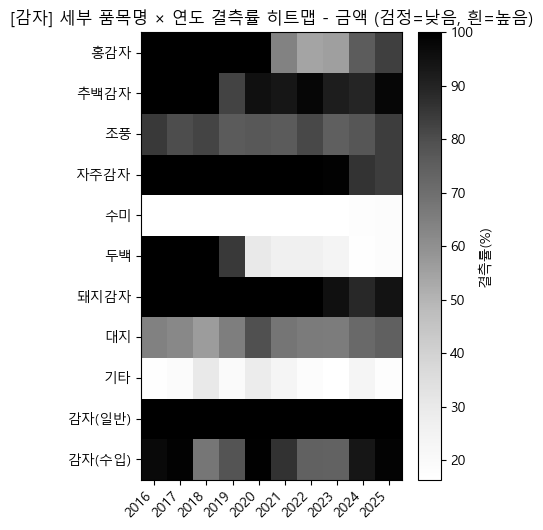

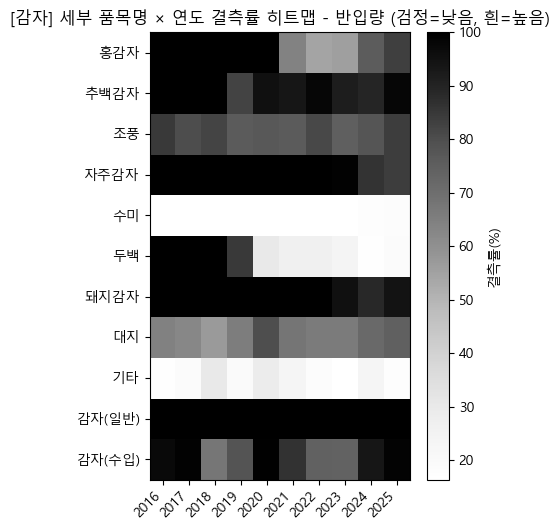

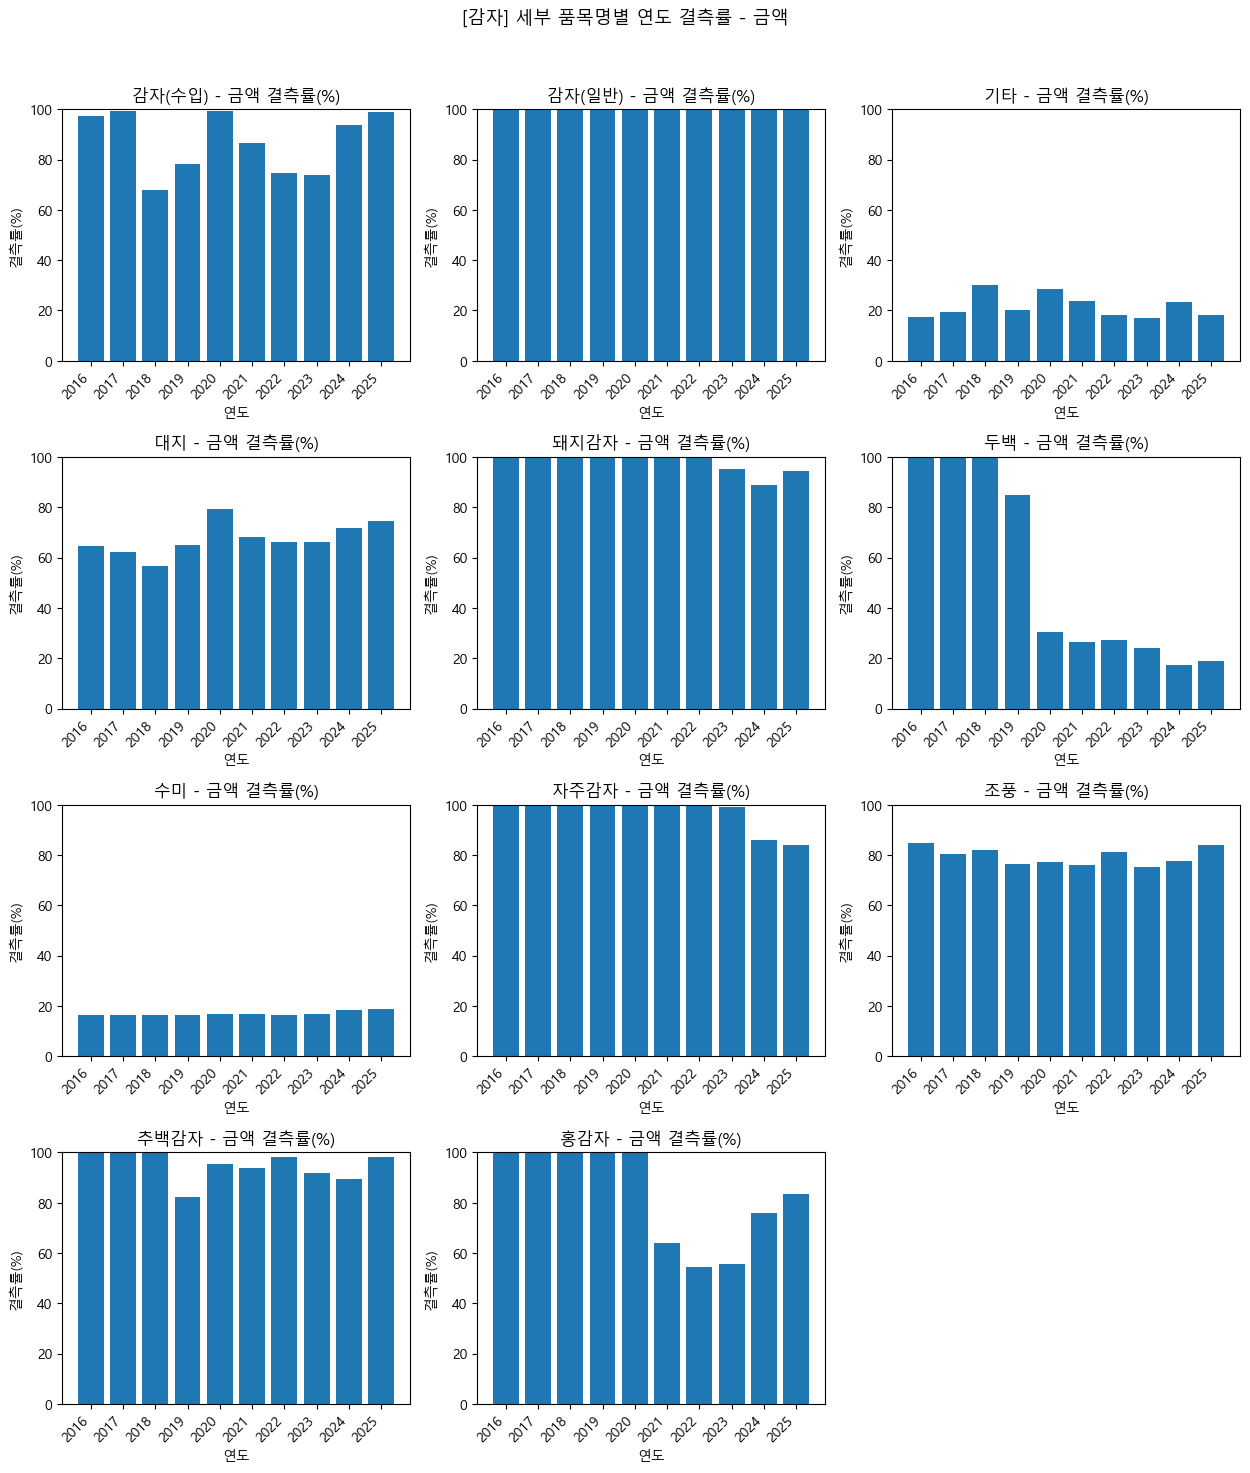

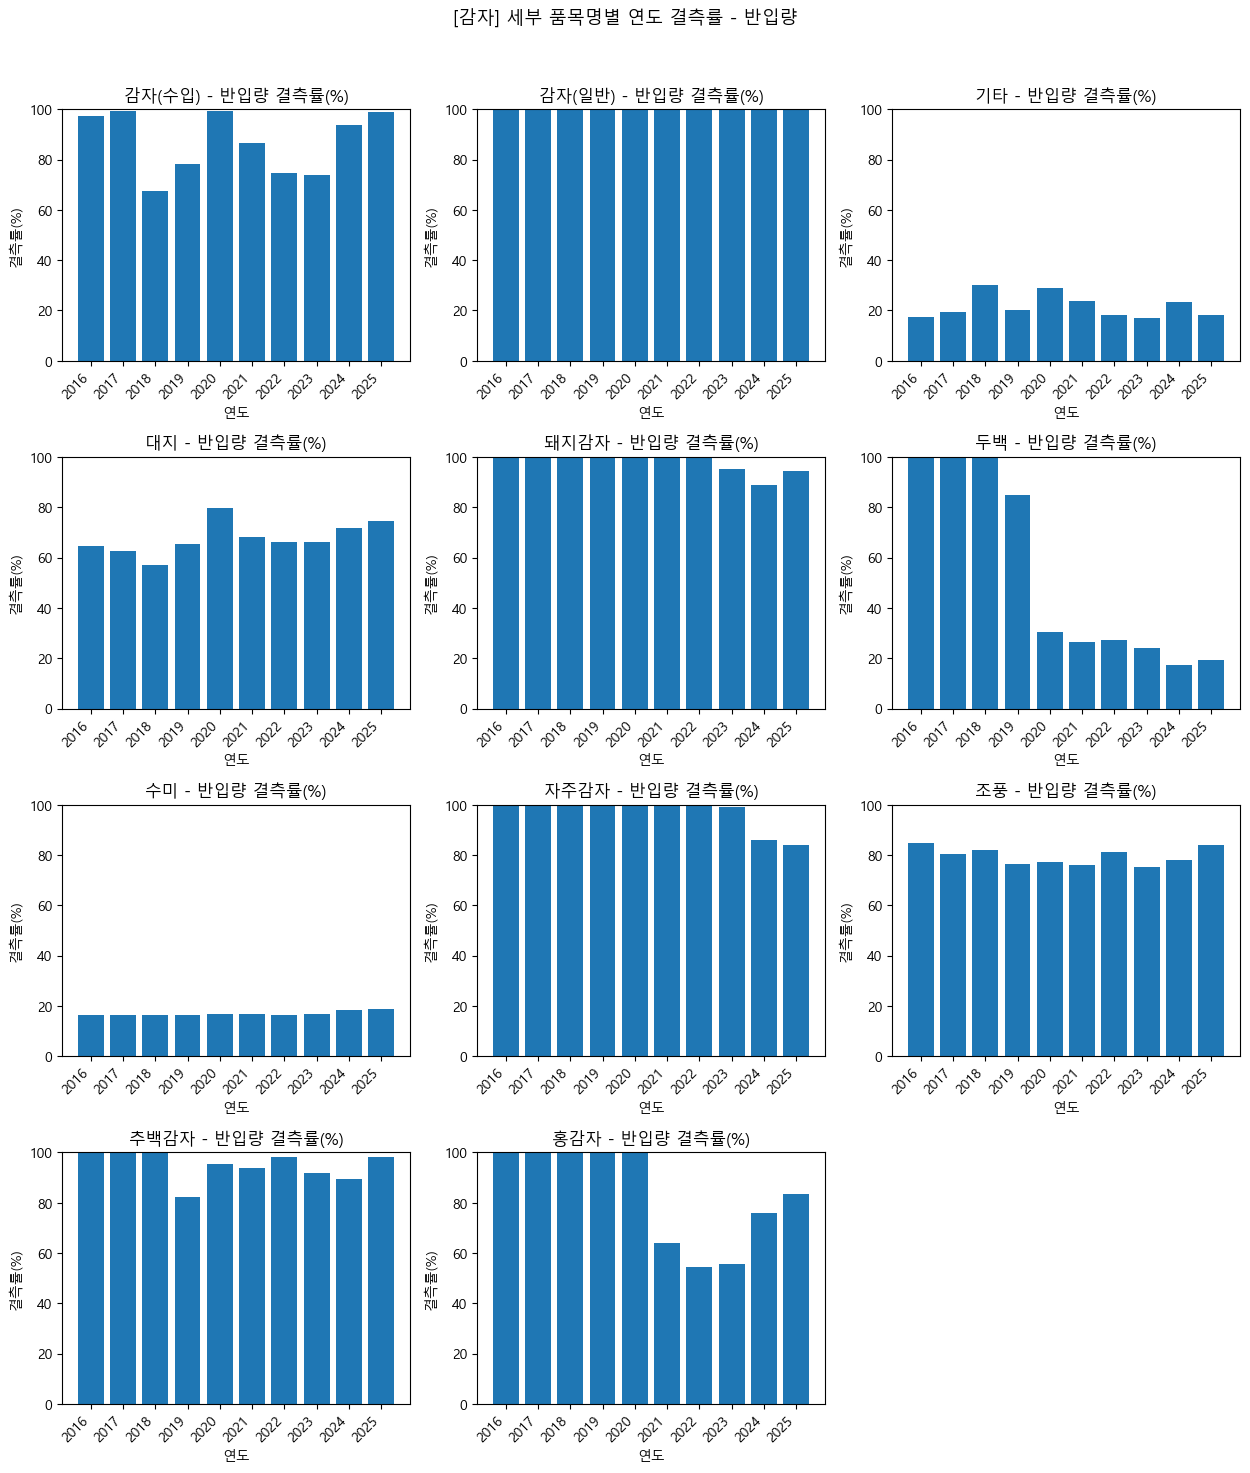


=== 고구마 결측 시각화 ===


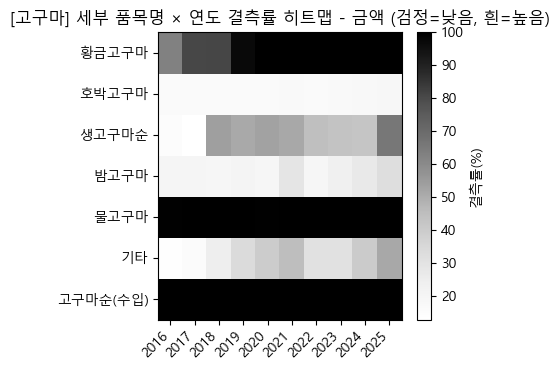

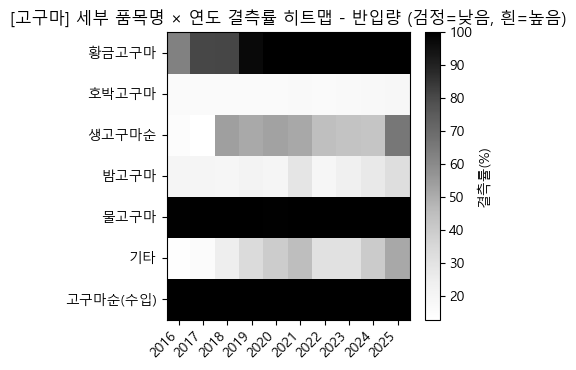

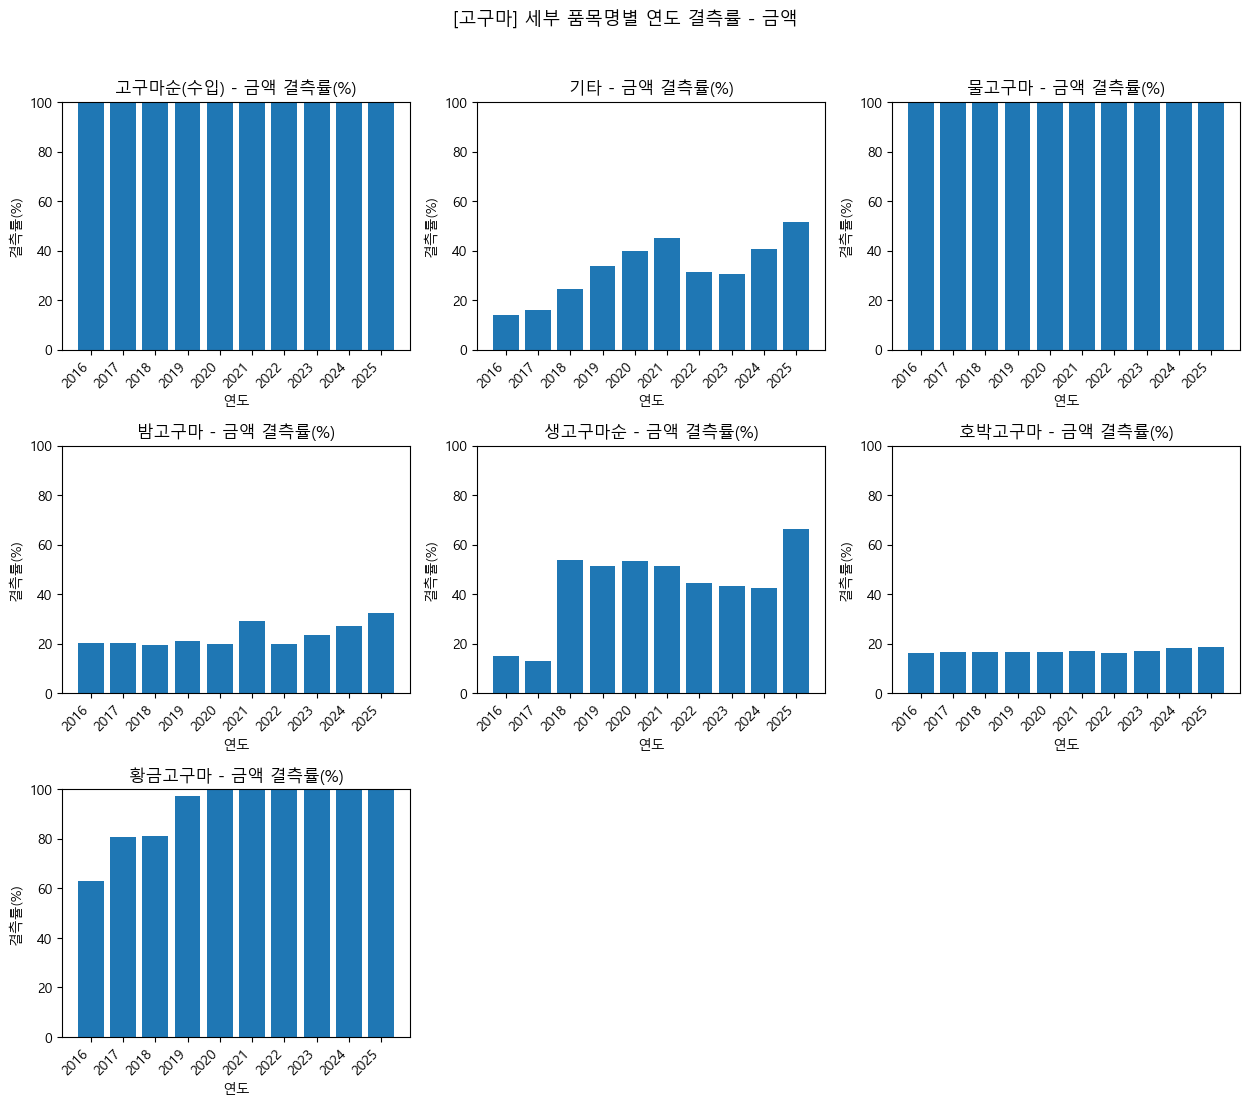

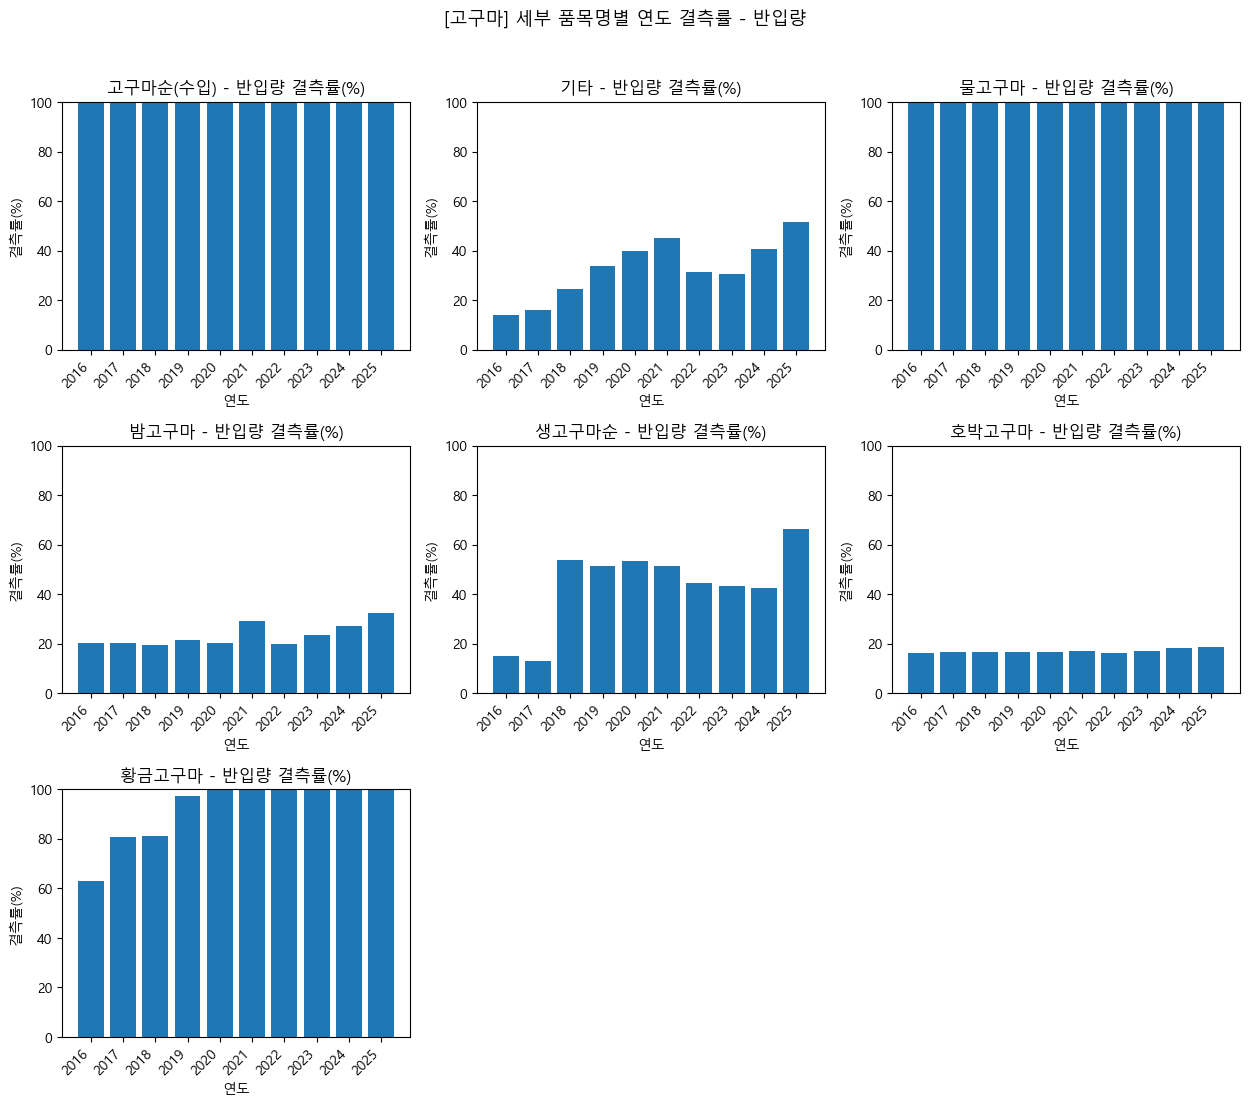


=== 느타리버섯 결측 시각화 ===


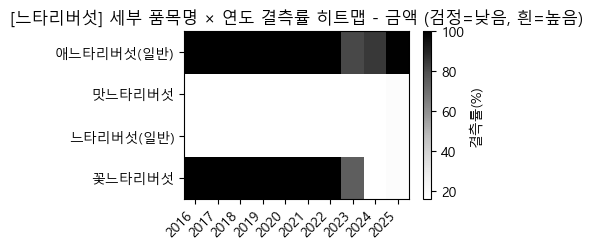

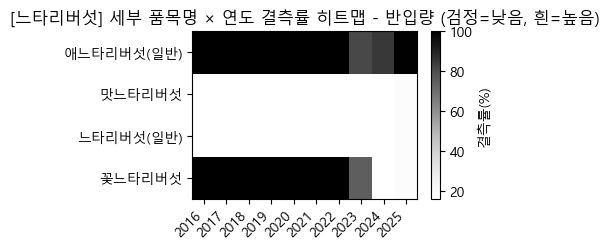

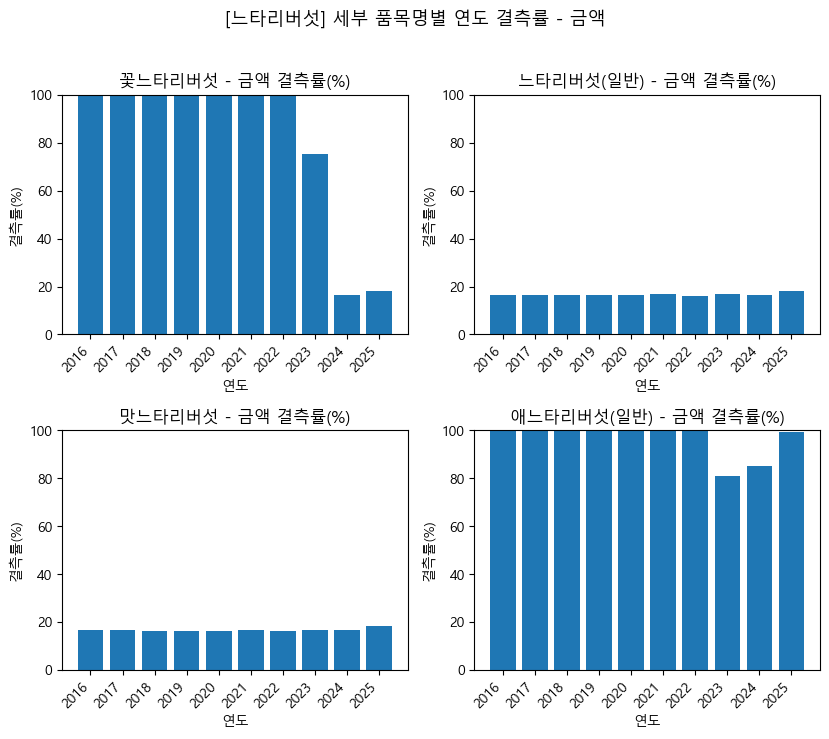

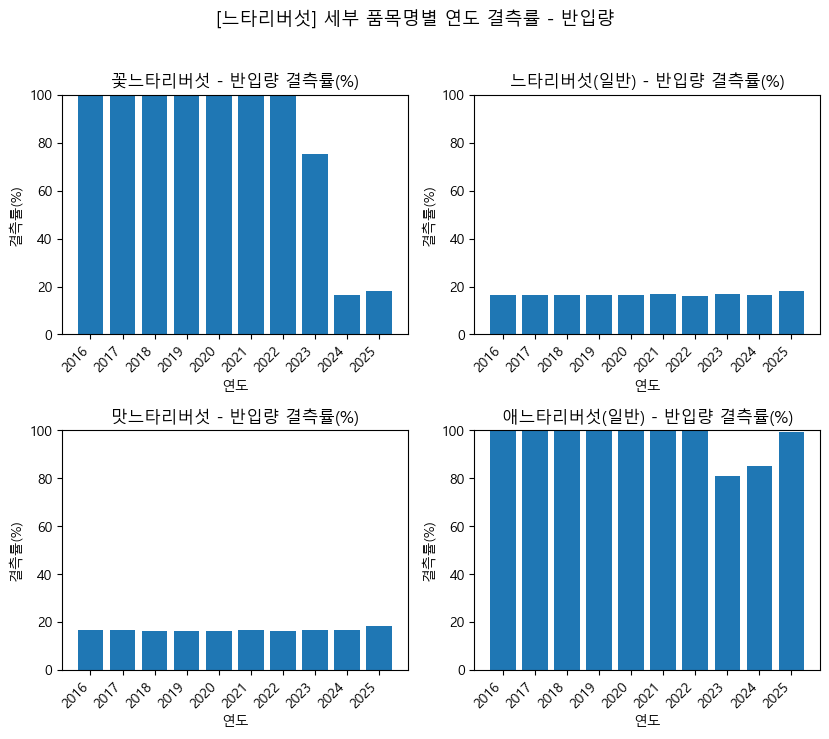


=== 단호박 결측 시각화 ===


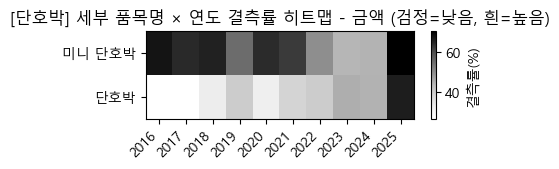

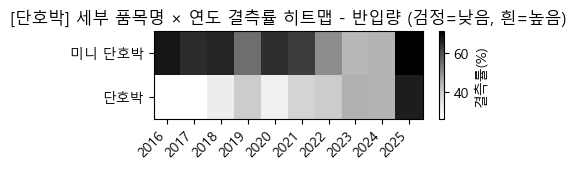

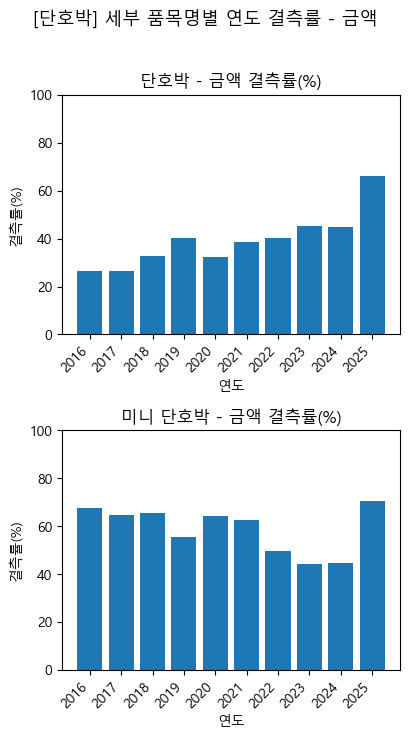

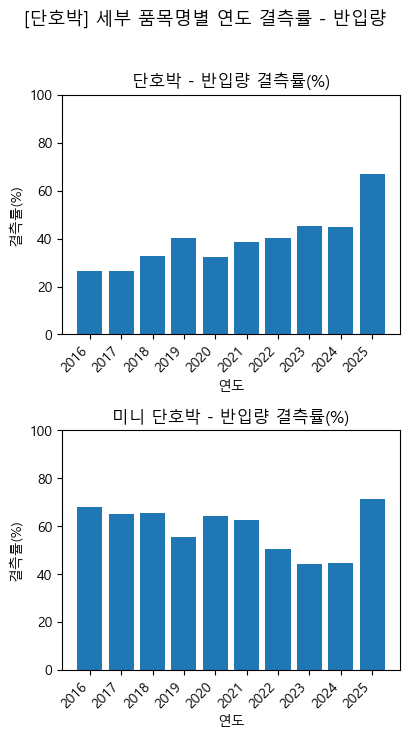


=== 새송이버섯 결측 시각화 ===


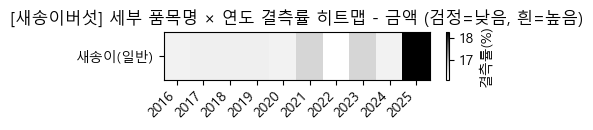

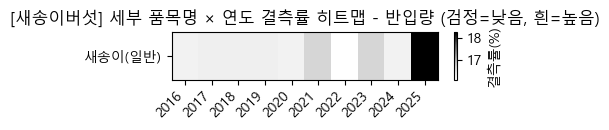

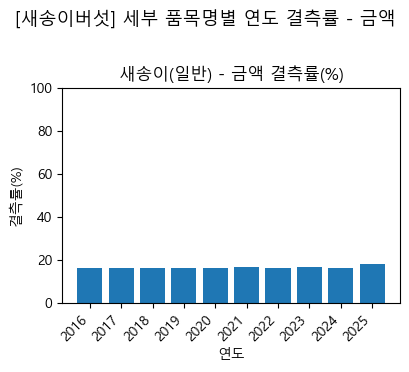

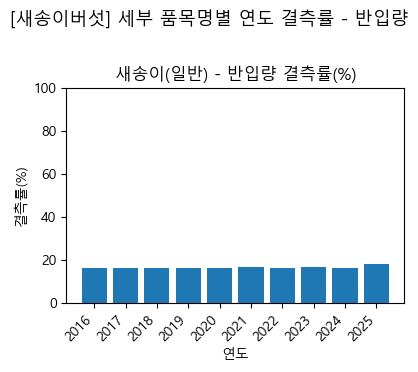


=== 양송이버섯 결측 시각화 ===


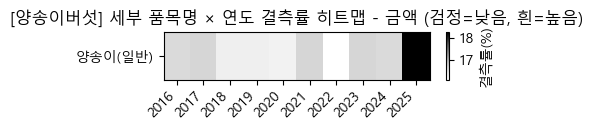

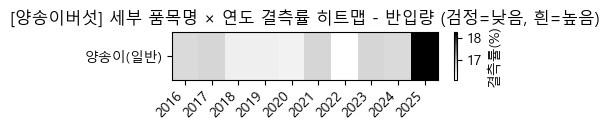

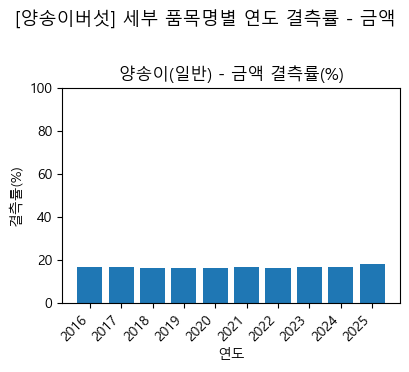

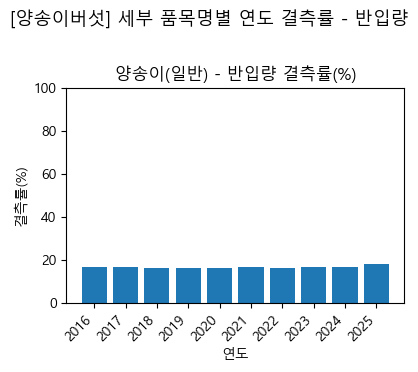


=== 적양배추 결측 시각화 ===


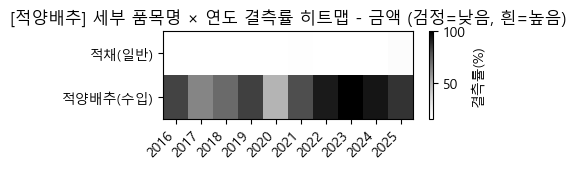

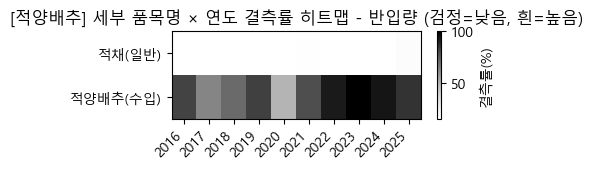

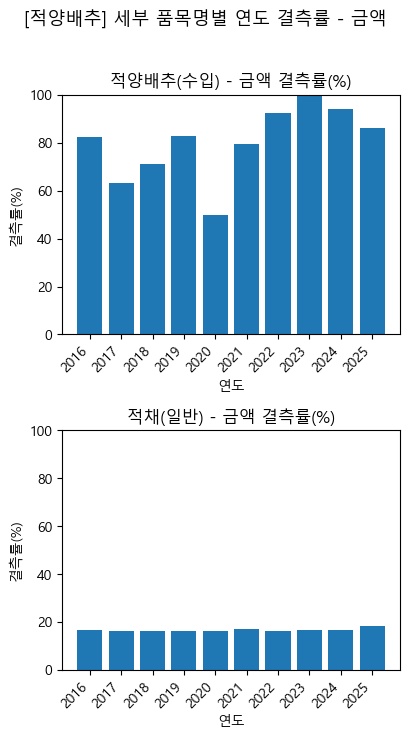

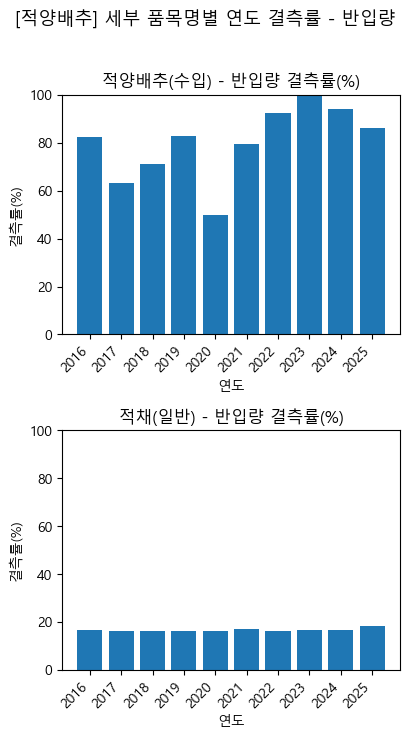


=== 토마토 결측 시각화 ===


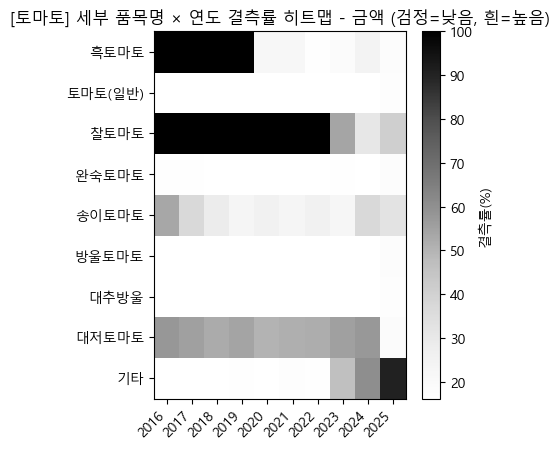

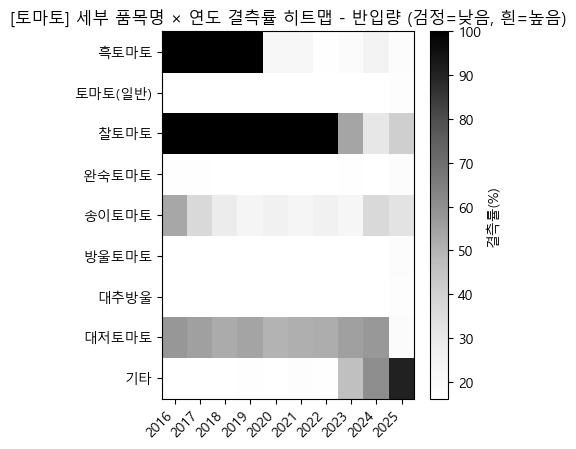

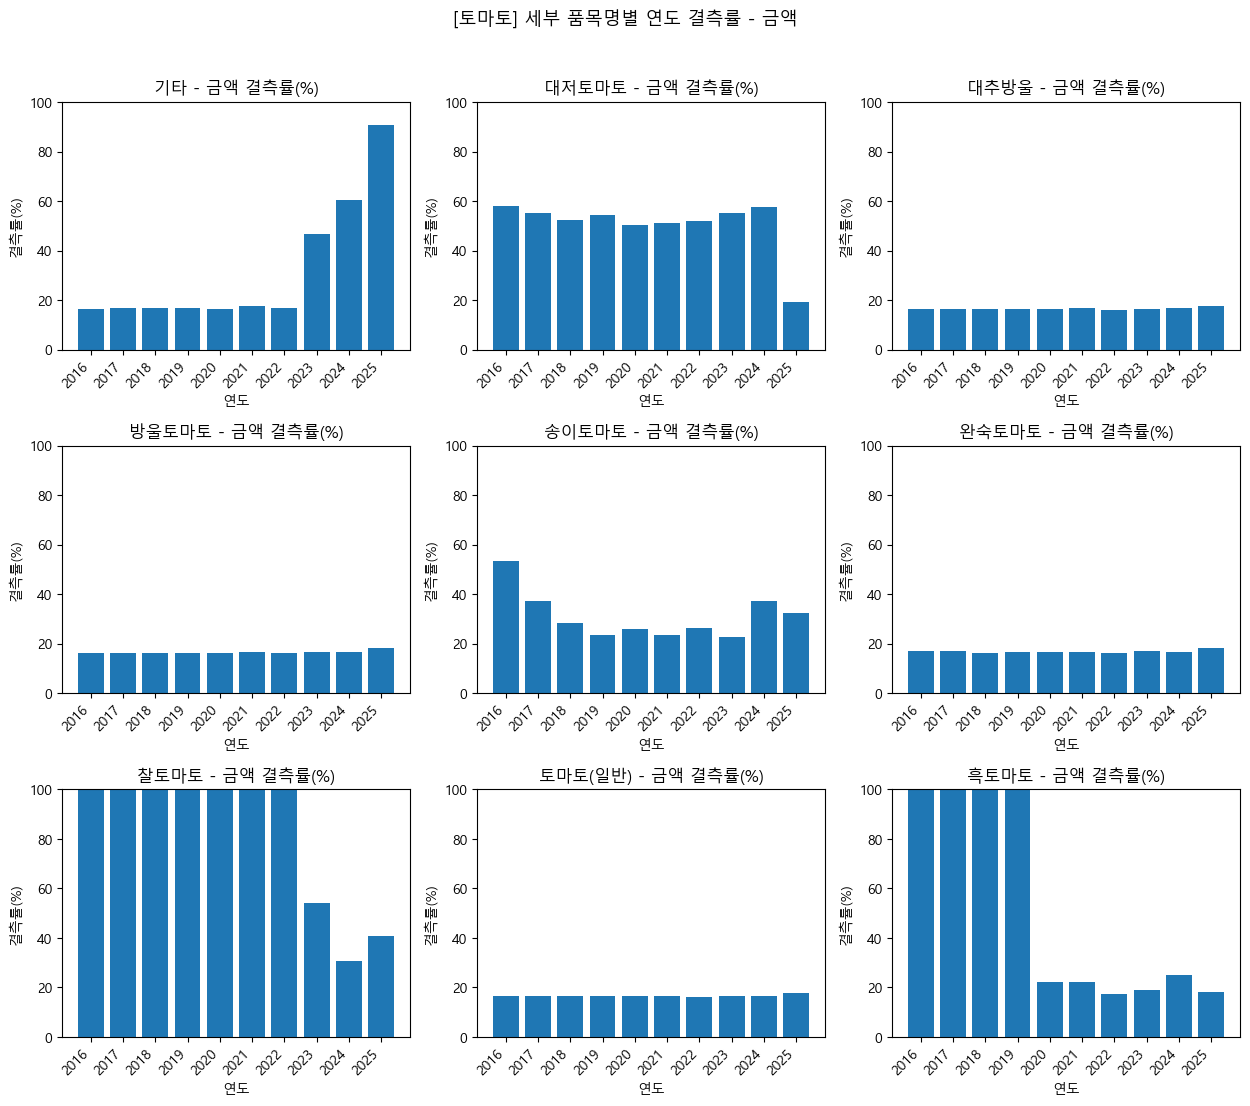

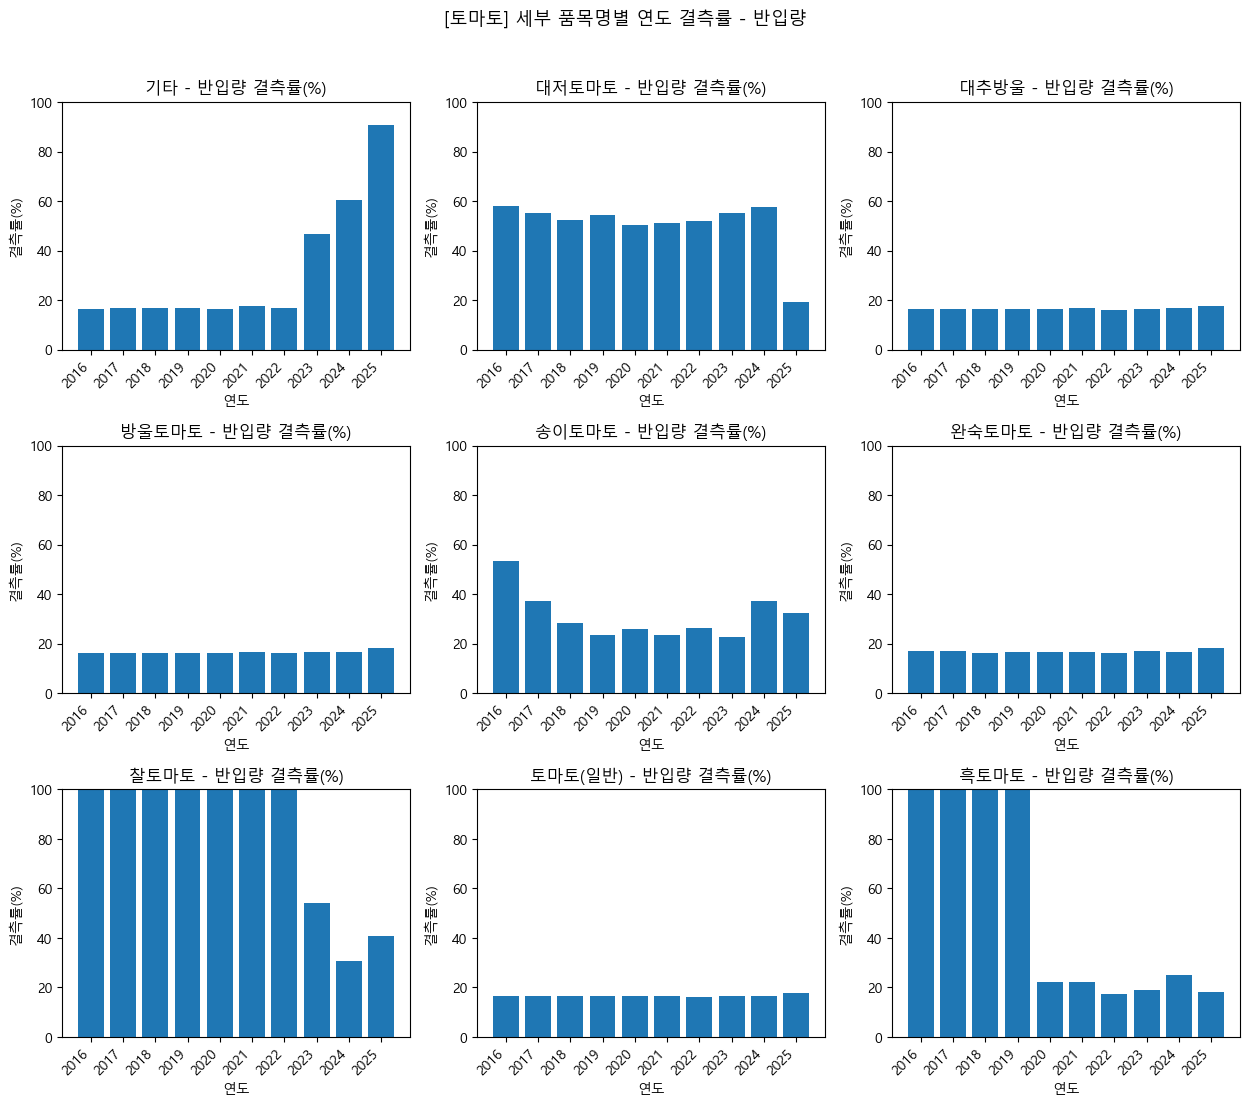


=== 팽이버섯 결측 시각화 ===


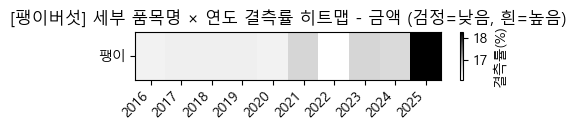

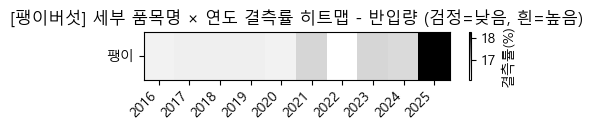

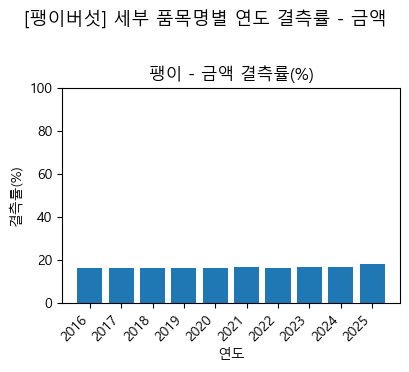

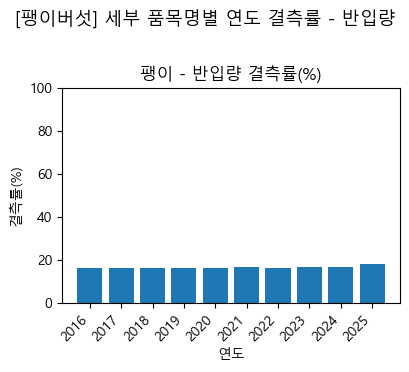


=== 표고버섯 결측 시각화 ===


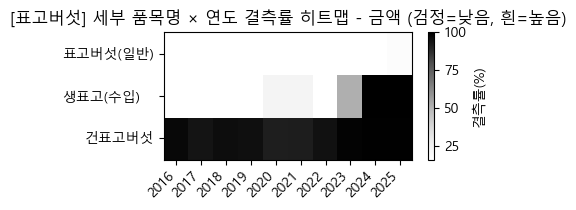

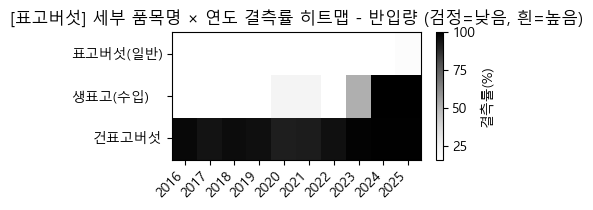

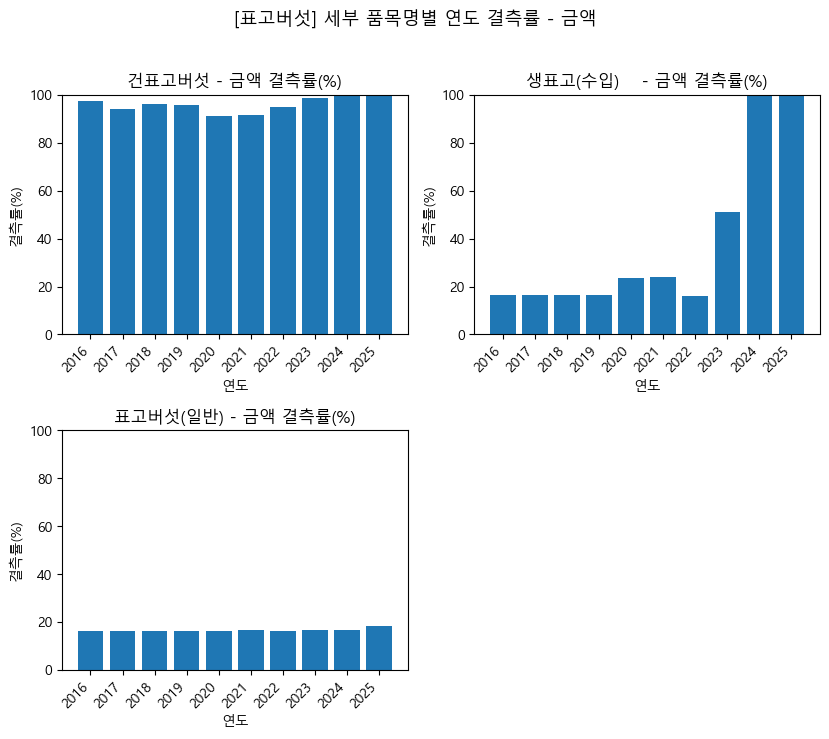

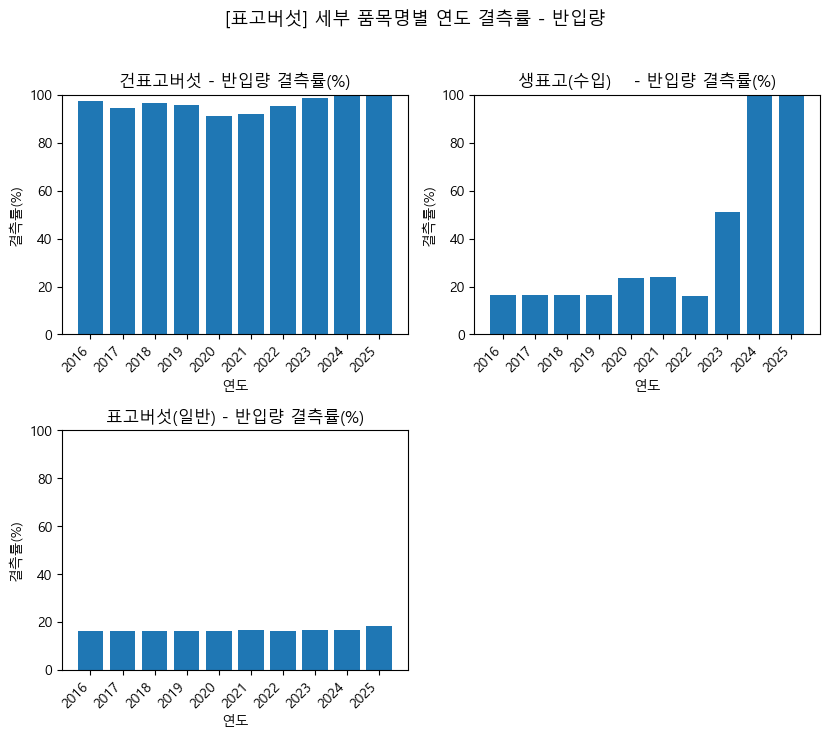

In [14]:
# =========================================================
# NAME_map
name_map = {
    "감자": potato_price,
    "고구마": sweet_price,
    "느타리버섯": oyster_price,
    "단호박": dan_price,
    "새송이버섯": new_price,
    "양송이버섯": sheep_price,
    "적양배추": red_price,
    "토마토": tomato_price,
    "팽이버섯": spin_price,
    "표고버섯": pyogo_price,
}

# =========================================================
# 2) Long 결합 (품목명 보존)
# =========================================================
long_list = []
for item, df in name_map.items():
    tmp = df.copy()
    assert '거래일자' in tmp.columns, f"{item}: '거래일자' 컬럼 필요"
    tmp['거래일자'] = pd.to_datetime(tmp['거래일자'], errors='coerce')

    # 숫자형 변환
    for col in ['금액','반입량','전년 금액','전년 반입량','평년 금액','평년 반입량']:
        if col in tmp.columns:
            tmp[col] = pd.to_numeric(tmp[col], errors='coerce')

    # 품목/품목명 보존
    tmp['품목'] = item
    if '품목명' not in tmp.columns:
        tmp['품목명'] = item

    long_list.append(tmp)

long_df = pd.concat(long_list, ignore_index=True)

# 사용 컬럼
use_cols = ['거래일자','품목','품목명'] + [c for c in ['금액','반입량'] if c in long_df.columns]
df_use = long_df[use_cols].dropna(subset=['거래일자']).copy()
df_use['연도'] = df_use['거래일자'].dt.year

# =========================================================
# 3) 시각화 유틸 (모든 품목 재활용 가능)
#    - 히트맵: 검정=결측률 낮음 / 흰=결측률 높음  (cmap='Greys')
# =========================================================
def _prep_item(df_all, target_item):
    assert {'거래일자','품목','품목명','연도'}.issubset(df_all.columns)
    return df_all[df_all['품목'] == target_item].copy()

def plot_subitem_year_missing_heatmap_for_item(
    df_all, target_item, value_col, last_n_years=10, cmap='Greys'
):
    df = _prep_item(df_all, target_item)
    if value_col not in df.columns:
        print(f"⚠ '{value_col}' 없음 → 히트맵 생략")
        return

    grp = (df.assign(결측=lambda x: x[value_col].isna().astype(int))
             .groupby(['품목명','연도'], as_index=False)['결측'].mean())
    grp['결측률(%)'] = grp['결측'] * 100

    years = sorted(grp['연도'].dropna().unique())
    if last_n_years and len(years) > last_n_years:
        years = years[-last_n_years:]
    grp = grp[grp['연도'].isin(years)]

    pivot_tbl = (grp.pivot(index='품목명', columns='연도', values='결측률(%)')
                   .loc[sorted(grp['품목명'].unique()), years])

    fig, ax = plt.subplots(figsize=(1.0 + 0.35*len(years), 1.0 + 0.4*len(pivot_tbl.index)))
    c = ax.pcolor(pivot_tbl.values, cmap=cmap)  # Greys: 낮음=검정, 높음=흰
    fig.colorbar(c, ax=ax, label='결측률(%)')
    ax.set_xticks(np.arange(pivot_tbl.shape[1]) + 0.5)
    ax.set_yticks(np.arange(pivot_tbl.shape[0]) + 0.5)
    ax.set_xticklabels(pivot_tbl.columns, rotation=45, ha='right')
    ax.set_yticklabels(pivot_tbl.index)
    ax.set_title(f"[{target_item}] 세부 품목명 × 연도 결측률 히트맵 - {value_col} (검정=낮음, 흰=높음)")
    plt.tight_layout(); plt.show()

def plot_subitem_year_bars_for_item(
    df_all, target_item, value_col, last_n_years=10
):
    df = _prep_item(df_all, target_item)
    if value_col not in df.columns:
        print(f"⚠ '{value_col}' 없음 → 막대그래프 생략")
        return

    sub_items = sorted(df['품목명'].dropna().unique())
    if not sub_items:
        print("⚠ 세부 품목명이 없습니다."); return

    n = len(sub_items)
    ncols = 3 if n >= 7 else (2 if n >= 3 else 1)
    nrows = ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(4.2*ncols, 3.6*nrows), squeeze=False)
    axes = axes.flatten()

    for i, sub_name in enumerate(sub_items):
        ax = axes[i]
        sub = df[df['품목명'] == sub_name]
        ser = sub.groupby('연도')[value_col].apply(lambda x: x.isna().mean()*100).sort_index()
        if last_n_years and len(ser.index) > last_n_years:
            ser = ser.iloc[-last_n_years:]
        ax.bar(ser.index.astype(str), ser.values)
        ax.set_title(f"{sub_name} - {value_col} 결측률(%)")
        ax.set_ylim(0, 100)
        ax.set_ylabel("결측률(%)"); ax.set_xlabel("연도")
        ax.set_xticklabels(ser.index.astype(str), rotation=45, ha='right')

    for j in range(i+1, len(axes)): fig.delaxes(axes[j])
    fig.suptitle(f"[{target_item}] 세부 품목명별 연도 결측률 - {value_col}", y=1.02, fontsize=13)
    plt.tight_layout(); plt.show()

def plot_year_matrix_by_subitem_for_item(
    df_all, target_item, cols=('금액','반입량'), last_n_years=10, max_rows_per_year=4000
):
    df = _prep_item(df_all, target_item)
    cols = [c for c in cols if c in df.columns]
    if not cols:
        print("⚠ 표시할 수 있는 수치 컬럼이 없습니다."); return

    for sub_name in sorted(df['품목명'].dropna().unique()):
        df_sub = df[df['품목명'] == sub_name]
        years = sorted(df_sub['연도'].dropna().unique())
        if last_n_years and len(years) > last_n_years: years = years[-last_n_years:]
        for yr in years:
            sub = df_sub[df_sub['연도'] == yr].sort_values('거래일자')
            if len(sub) == 0: continue
            mat = sub[cols].isna().astype(int).values.T
            if mat.shape[1] > max_rows_per_year:
                idx = np.linspace(0, mat.shape[1]-1, max_rows_per_year).astype(int)
                mat = mat[:, idx]

            fig, ax = plt.subplots(figsize=(10, 1.0 + 0.4*len(cols)))
            ax.imshow(mat, aspect='auto', interpolation='nearest', cmap='Greys')
            ax.set_title(f"[{target_item}] {sub_name} - {yr}년 결측 패턴 (흰=정상, 검=결측)")
            ax.set_yticks(np.arange(len(cols))); ax.set_yticklabels(cols); ax.set_xticks([])
            plt.tight_layout(); plt.show()

def run_missing_visuals_for_item(
    df_all, target_item, cols=("금액","반입량"), last_n_years=10, show_matrix=False
):
    for col in cols:
        plot_subitem_year_missing_heatmap_for_item(df_all, target_item, col, last_n_years, cmap='Greys')
    for col in cols:
        plot_subitem_year_bars_for_item(df_all, target_item, col, last_n_years)
    if show_matrix:
        plot_year_matrix_by_subitem_for_item(df_all, target_item, cols, last_n_years)

# =========================================================
# 4) (옵션) 주간 평균가격(월~일, 일요일 종료) 계산 유틸
#     - 주간총금액 / 주간총반입량
#     - 금액/반입량 둘 다 존재하는 날만 집계(왜곡 방지)
# =========================================================
def weekly_price_for_item(
    df_all, target_item, by='품목명', week='W-SUN'  # 월요일 시작~일요일 종료
):
    assert by in ('품목','품목명')
    df = _prep_item(df_all, target_item)
    df_valid = df.dropna(subset=['금액','반입량']).set_index('거래일자')

    grp_cols = [by]
    weekly = (df_valid
              .groupby(grp_cols)
              .resample(week, label='right', closed='right')
              .agg(주간총금액=('금액','sum'), 주간총반입량=('반입량','sum'))
              .reset_index())
    weekly['주간단가'] = weekly['주간총금액'] / weekly['주간총반입량']
    return weekly  # 필요 시 pivot도 가능

# =========================================================
# 5) 실행: 모든 품목 동일 루틴
# =========================================================
items_to_run = list(name_map.keys())   # 전 품목
# items_to_run = ["감자","고구마","토마토"]  # 일부만 테스트할 때

for it in items_to_run:
    print(f"\n=== {it} 결측 시각화 ===")
    run_missing_visuals_for_item(df_use, it, cols=("금액","반입량"), last_n_years=10, show_matrix=False)

# (옵션) 주간단가 예시: 감자 세부품목별
# weekly_potato = weekly_price_for_item(df_use, "감자", by='품목명', week='W-SUN')
# display(weekly_potato.head())


# 1. 결측치 총 갯수 및 결측치 패턴 확인